<a href="https://colab.research.google.com/github/caua-sathler/NEURAL-NETWORKS/blob/main/MLP-SGD/MLP_Adam_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_dim, 16)
    self.fc2 = nn.Linear(16, 8)
    self.fc3 = nn.Linear(8, 8)
    self.fc4 = nn.Linear(8, output_dim)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

model = MLP(input_dim=13, output_dim=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 120
batch_size = 32

for epoch in range(epochs):
    model.train()

    indices = torch.randperm(X_train.shape[0])
    X_train = X_train[indices]
    y_train = y_train[indices]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 10/120, Loss: 0.0006
Epoch 20/120, Loss: 0.0006
Epoch 30/120, Loss: 0.0005
Epoch 40/120, Loss: 0.0005
Epoch 50/120, Loss: 0.0003
Epoch 60/120, Loss: 0.0002
Epoch 70/120, Loss: 0.0003
Epoch 80/120, Loss: 0.0006
Epoch 90/120, Loss: 0.0001
Epoch 100/120, Loss: 0.0003
Epoch 110/120, Loss: 0.0003
Epoch 120/120, Loss: 0.0002


In [ ]:
model.eval()

with torch.no_grad():
  outputs = model(X_test)
  predictions = torch.argmax(outputs, dim=1).numpy()
  accuracy = (predictions == y_test).float().mean()
  print(f'Test set accuracy: {accuracy.item() * 100:.2f}%')

Test set accuracy: 100.00%


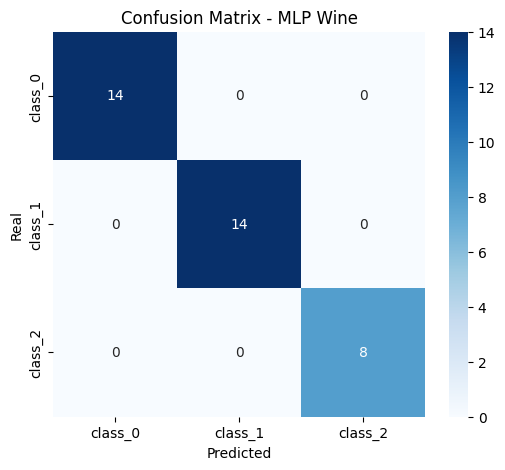

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix - MLP Wine")
plt.show()